# Analyzing Bike Sharing Trends

#### Given this dataset (bike sharing details along with weather information), can we forecast bike rental demand for this program?

## 1. Exploratory Data Analysis

In [2]:
import pandas as pd

In [3]:
hour_df = pd.read_csv("Bike-Sharing-Dataset\hour.csv")
day_df = pd.read_csv("Bike-Sharing-Dataset\day.csv")

In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
print("Shape of hour dataset:{0} \nShape of day dataset:{1}".format(hour_df.shape, day_df.shape))

Shape of hour dataset:(17379, 17) 
Shape of day dataset:(731, 16)


### Change attribute names

In [7]:
hour_df.rename(columns={'instant': 'rec_id',
                       'dteday':'datetime',
                       'holiday':'is_holiday',
                       'workingday':'is_workingday',
                       'weathersit':'weather_condition',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                       'hr':'hour',
                       'yr':'year'}, inplace=True)

In [8]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Change attribute types

In [9]:
hour_df.dtypes

rec_id                 int64
datetime              object
season                 int64
year                   int64
month                  int64
hour                   int64
is_holiday             int64
weekday                int64
is_workingday          int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
total_count            int64
dtype: object

In [10]:
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

### Distribution and Trends

In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

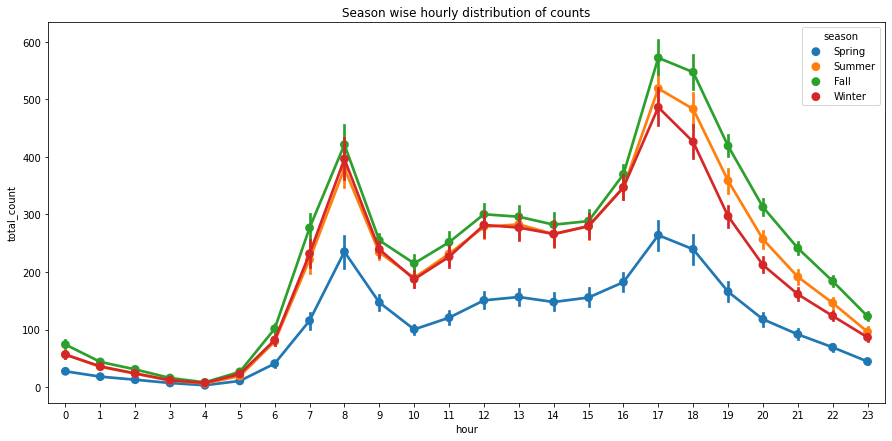

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
sns.pointplot(x = hour_df['hour'], y = hour_df['total_count'], hue = hour_df['season'].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}),ax= ax )
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

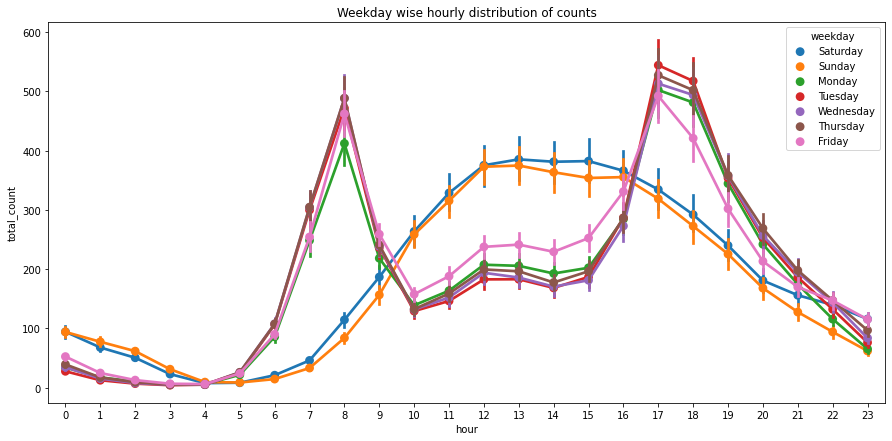

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
sns.pointplot(x = hour_df['hour'], y = hour_df['total_count'], hue = hour_df['weekday'].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}),ax= ax )
ax.set(title="Weekday wise hourly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

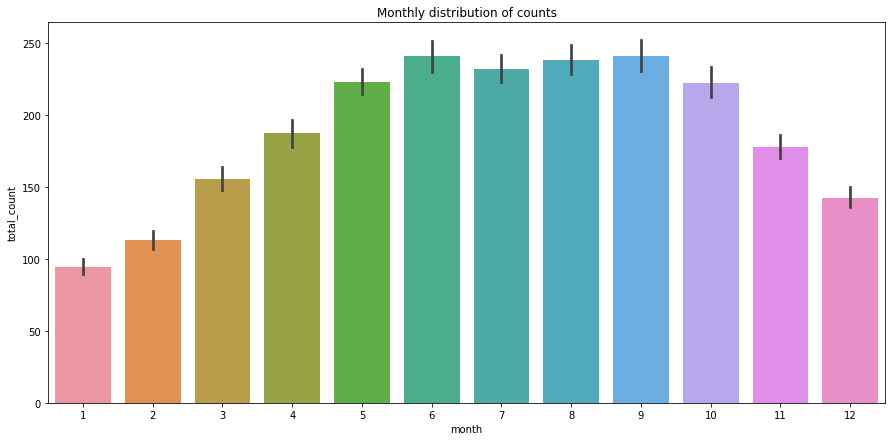

In [15]:
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(x = hour_df['month'], y = hour_df['total_count'])
ax.set(title="Monthly distribution of counts")

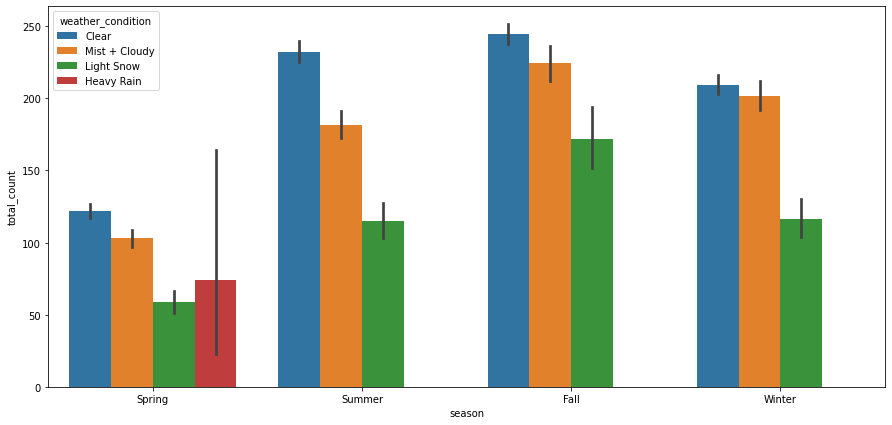

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x=hour_df.season.map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}), y=hour_df.total_count,hue=hour_df.weather_condition.map({1:"Clear", 2:"Mist + Cloudy", 3:"Light Snow", 4:"Heavy Rain"}), ax= ax)

C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


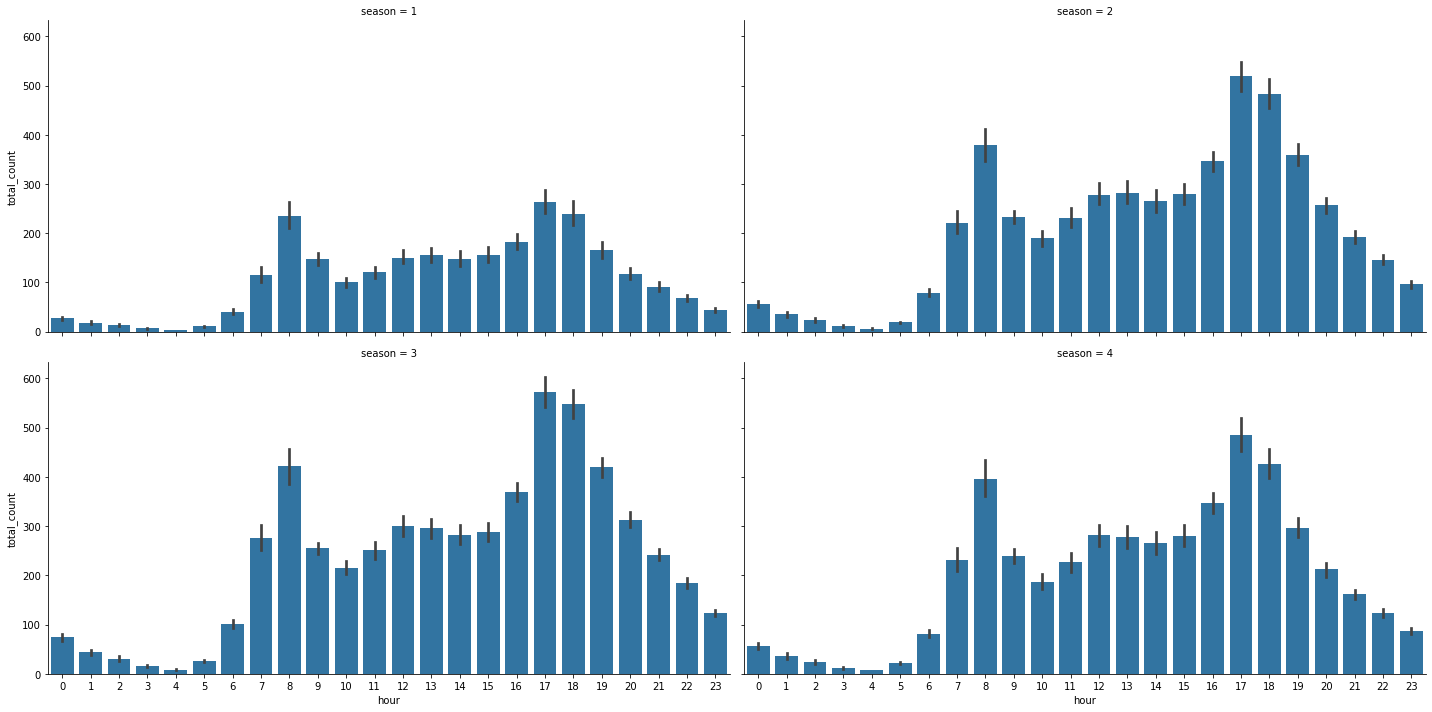

In [17]:
g = sns.FacetGrid(hour_df, col="season", height=5, col_wrap=2, aspect=2)
g.map(sns.barplot, 'hour', 'total_count')

Text(0.5, 1.0, 'Violin plot showcasing year-wise ridership distribution')

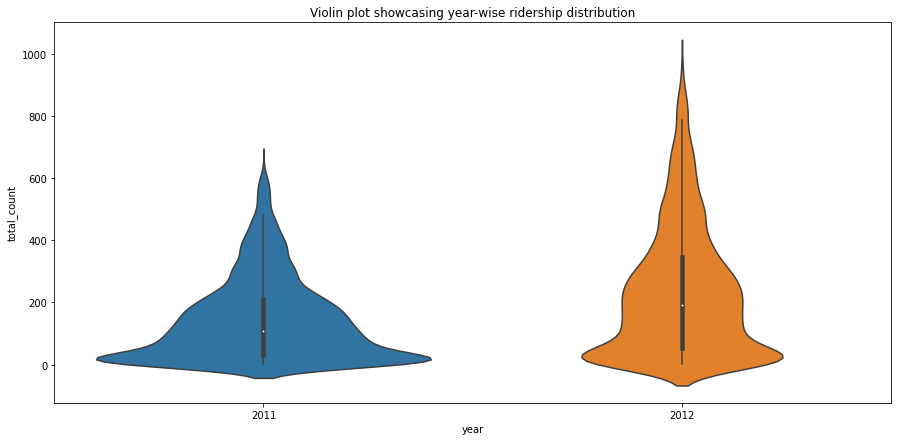

In [18]:
plt.figure(figsize=(15,7))
sns.violinplot(x = hour_df.year.map({0: '2011', 1:'2012'}), y = hour_df.total_count)
plt.title("Violin plot showcasing year-wise ridership distribution")

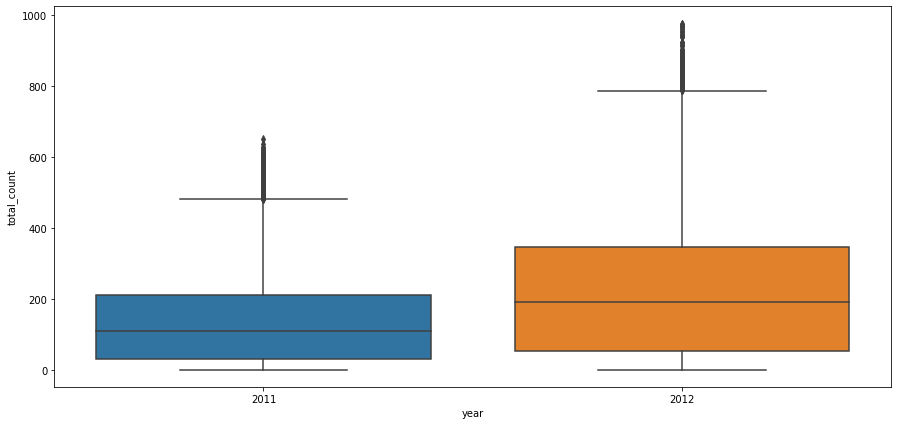

In [19]:
plt.figure(figsize=(15,7))
sns.boxplot(x = hour_df.year.map({0: '2011', 1:'2012'}), y = hour_df.total_count)

### Outliers

Text(0.5, 0.98, 'Outliers in the dataset')

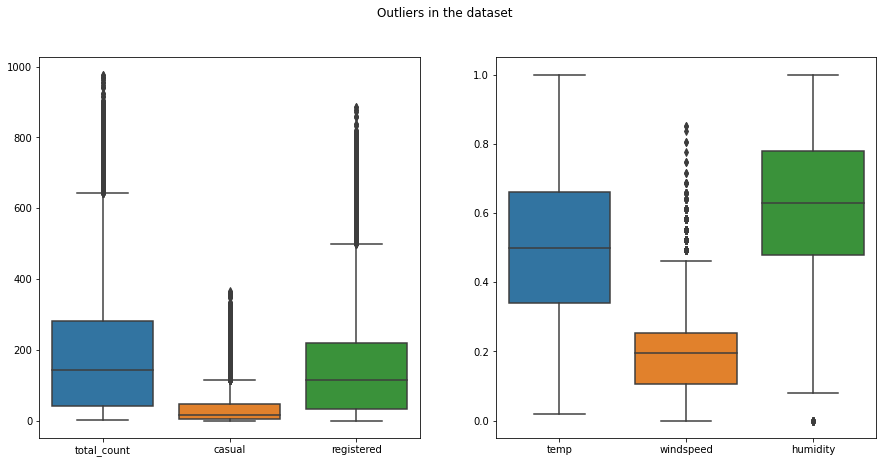

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
sns.boxplot(data= hour_df[["total_count", "casual", "registered"]], ax= ax1)
sns.boxplot(data= hour_df[["temp", "windspeed", "humidity"]], ax= ax2)
fig.suptitle("Outliers in the dataset")

Text(0.5, 1.0, 'Outliers in hourly distribution of ridership')

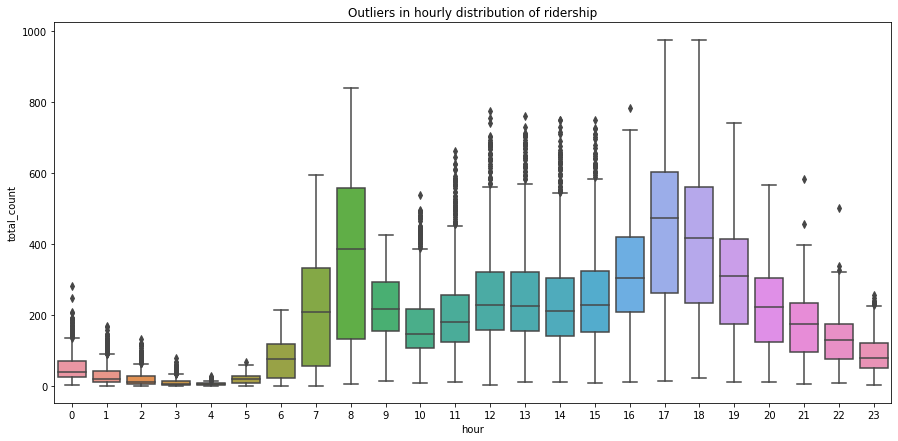

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = hour_df['hour'], y = hour_df['total_count'],ax= ax )
ax.set_title("Outliers in hourly distribution of ridership")

### Correlations

In [22]:
mat_corr = hour_df[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "total_count"]].corr()
mat_corr

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
total_count,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [23]:
import numpy as np

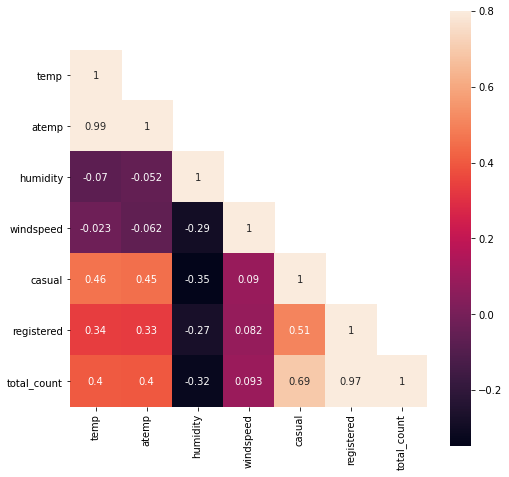

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
#fig.suptitle("Correlational matrix",x = 0.6)
mask = np.array(mat_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(mat_corr, mask=mask, vmax=.8, square=True, annot=True, ax= ax)

## 2. Regression Analysis

### Modeling

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [26]:
def one_hot_encode(df, col_name):
    le = LabelEncoder() # Encode target labels with value between 0 and n_classes-1.
    lab = le.fit_transform(df[col_name]) # fit + transform
    #df[col_name+'_label'] = le_labels
    ohe = OneHotEncoder() # One hot encoding
    ohe_ = ohe.fit_transform(lab.reshape(len(lab),1)) # we need to reshape to (x,1)
    new_columns = [col_name+'_'+str(cls_label) for cls_label in le.classes_] # new features == class labels
    features_df = pd.DataFrame(ohe_.toarray(), columns=new_columns)
    return le,ohe,features_df

In [27]:
cat_features = ['season','is_workingday','weather_condition', 'is_holiday']
one_hot_list = []
for var in cat_features:
    one_hot_list.append(one_hot_encode(hour_df, var)[2])
one_hot_df = pd.concat(one_hot_list, axis=1)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

In [28]:
hour_df_ = hour_df.drop(['season','is_workingday','weather_condition', 'is_holiday'],axis=1)

In [29]:
hour_df_ = pd.concat([hour_df_, one_hot_df], axis=1)

In [30]:
l = list(hour_df_.columns) # make casual	registered	total_count at the end
l = l[:10] + l[13:] + l[10:13]
hour_df_ = hour_df_.reindex(columns=l)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(hour_df_.iloc[:,3:-3],hour_df_.iloc[:,-1], test_size=0.33,random_state=42)

In [33]:
X_train.reset_index(drop=True, inplace=True) # X_train, X_test == Dataframe
X_test.reset_index(drop=True, inplace=True)

In [34]:
y_train = y_train.reset_index(drop=True) #y_train, y_test == series
y_test = y_test.reset_index(drop=True)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [35]:
print("Shape train::{}".format(X_train.shape))
print("Shape test::{}".format(X_test.shape))

Shape train::(11643, 19)
Shape test::(5736, 19)


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
from sklearn.model_selection import cross_val_predict

In [39]:
pred = cross_val_predict(model,X_train,y_train,cv=10)

Text(0.5, 1.0, 'Residual plot')

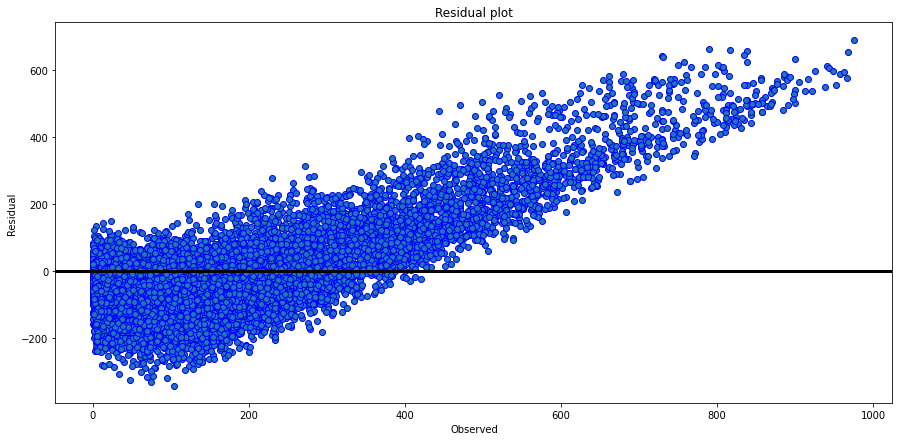

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(y_train, y_train-pred, edgecolors=(0, 0, 1))
ax.axhline(0,lw = 3, c = 'black')
ax.set_xlabel("Observed")
ax.set_ylabel("Residual")
ax.set_title("Residual plot")

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
scores = cross_val_score(model,X_train,y_train, cv=10)

In [43]:
scores

array([0.34463737, 0.29429366, 0.33876413, 0.32967783, 0.38277578,
       0.38245661, 0.32023122, 0.34140881, 0.34339806, 0.36496392])

Text(0.5, 1.0, 'Cross validation scores: AVG = 0.344260739041378')

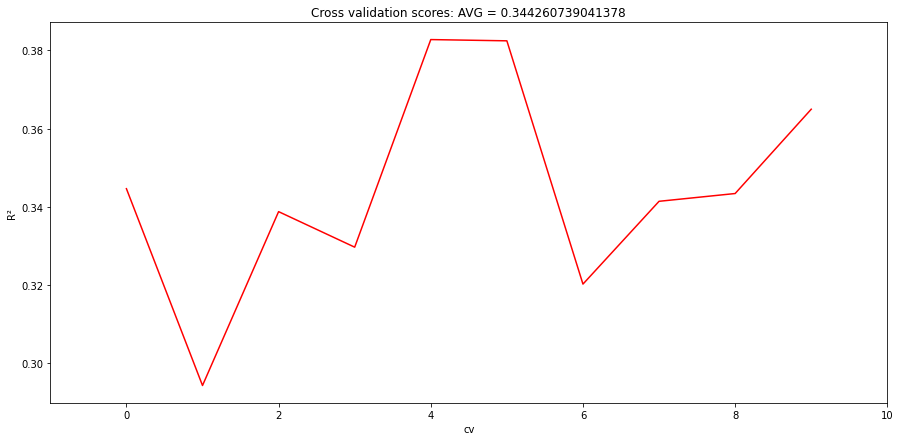

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(scores, 'r')
plt.xlim([-1,10])
ax.set_xlabel("cv")
ax.set_ylabel("R²")
ax.set_title("Cross validation scores: AVG = {0}".format(scores.mean()))

In [45]:
from statsmodels.graphics.gofplots import qqplot

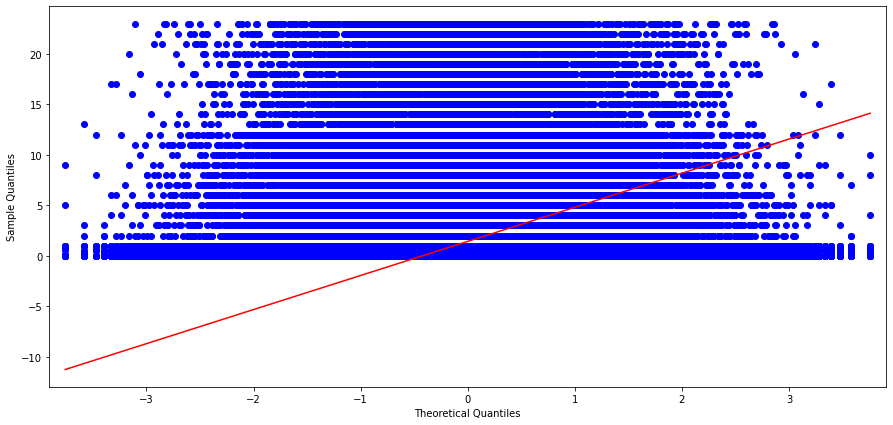

In [46]:
fig, ax = plt.subplots(figsize=(15,7))
x = qqplot(X_train, line='s', ax= ax)

In [47]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
pred = model.predict(X_test)
residuals = y_test-pred

In [49]:
from sklearn.metrics import r2_score

Text(0.5, 1.0, 'Residual plot R² = 0.36011346966778945')

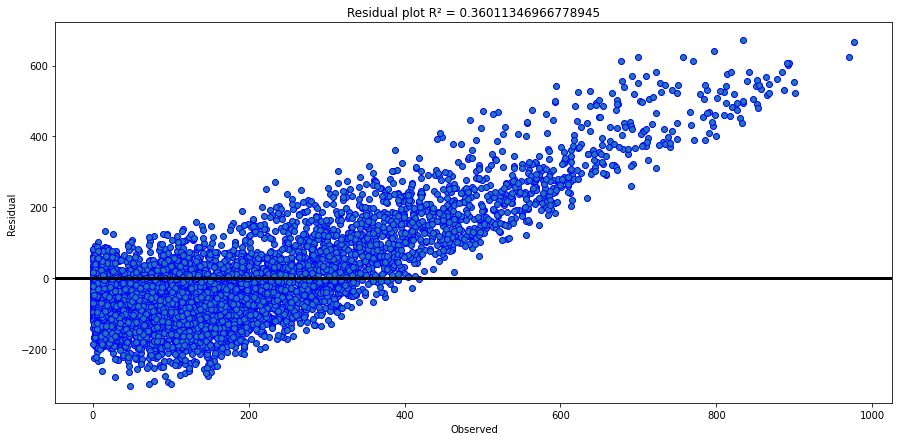

In [50]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(y_test, y_test-pred, edgecolors=(0, 0, 1))
ax.axhline(0,lw = 3, c = 'black')
ax.set_xlabel("Observed")
ax.set_ylabel("Residual")
ax.set_title("Residual plot R² = {0}".format(r2_score(y_test,pred)))

## 3. Decision Tree Based Regression

In [51]:
from sklearn import tree

In [52]:
clf = tree.DecisionTreeRegressor(max_depth=4,
                                 min_samples_split=4,
                                max_leaf_nodes=10)

In [53]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [54]:
import graphviz

In [55]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

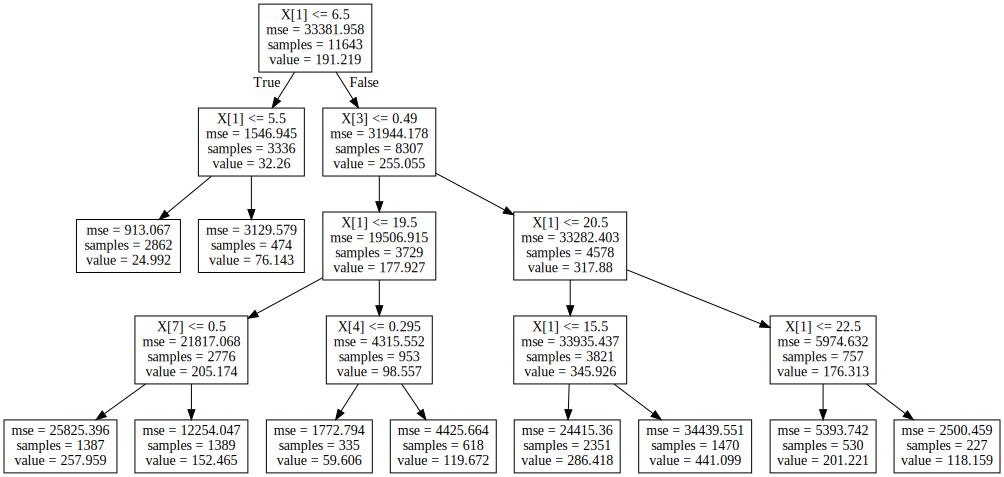

In [56]:
graph

In [57]:
from sklearn.model_selection import GridSearchCV # search for best hyperparameters

In [58]:
param = {"criterion":['mse','mae'],
    "max_depth":[2, 6, 8],
    "min_samples_split":[10, 20, 40],
    "min_samples_leaf":[20, 40, 100],
    "max_leaf_nodes":[5, 20, 100, 500, 800],
    }

In [59]:
grid_cv_dtr = GridSearchCV(clf, param, cv=5)

In [60]:
grid_cv_dtr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=4,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100, 500, 800],
                         'min_samples_leaf': [20, 40, 100],
            

In [62]:
print("R-Squared:{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters:\n{}".format(grid_cv_dtr.best_params_))

R-Squared:0.7797317077198438
Best Hyperparameters:
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 20}


In [64]:
result = pd.DataFrame(grid_cv_dtr.cv_results_)

In [65]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011165,0.002782,0.002000,0.000886,mse,2,5,20,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
1,0.012509,0.006255,0.000000,0.000000,mse,2,5,20,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
2,0.003117,0.006235,0.006255,0.007660,mse,2,5,20,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
3,0.006249,0.007653,0.000000,0.000000,mse,2,5,40,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
4,0.009380,0.007658,0.000000,0.000000,mse,2,5,40,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
5,0.006249,0.007653,0.000000,0.000000,mse,2,5,40,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
6,0.006247,0.007652,0.003124,0.006249,mse,2,5,100,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
7,0.000000,0.000000,0.006249,0.007654,mse,2,5,100,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
8,0.003125,0.006250,0.000000,0.000000,mse,2,5,100,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
9,0.009372,0.007652,0.000000,0.000000,mse,2,20,20,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181


Text(0.5, 0.98, 'Affect of Depth, Leaf Nodes and samples leaf on Model Performance')

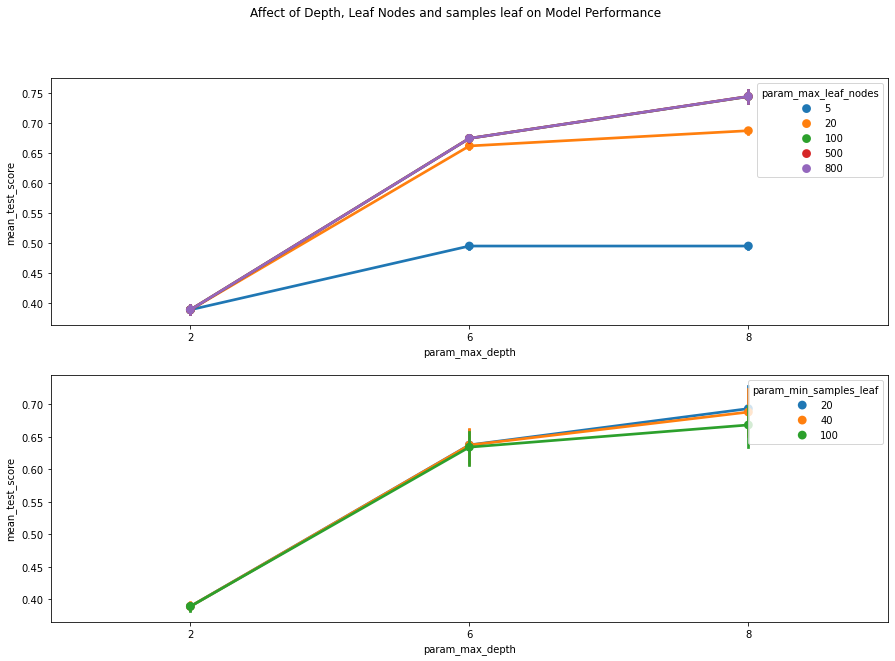

In [80]:
fig,(ax1, ax2) = plt.subplots(nrows=2, figsize=(15,10))
sns.pointplot(x = result['param_max_depth'], y = result['mean_test_score'], hue=result['param_max_leaf_nodes'], ax = ax1)
sns.pointplot(x = result['param_max_depth'], y = result['mean_test_score'], hue=result['param_min_samples_leaf'], ax = ax2)
fig.suptitle("Affect of Depth, Leaf Nodes and samples leaf on Model Performance")

### Trainning with best hyperparameters

In [84]:
best_hyperparameters = grid_cv_dtr.best_params_

In [98]:
model = tree.DecisionTreeRegressor(criterion='mse',max_depth=8,
                                   max_leaf_nodes=500,
                                   min_samples_leaf=20,
                                   min_samples_split=20)

In [99]:
model

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=500, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [100]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=500, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Testing

In [104]:
pred = model.predict(X_test)

In [105]:
residuals_ = np.abs(pred - y_test)

In [116]:
pred = pred.reshape(pred.shape[0],1)

In [119]:
r2_score(y_test,pred)

0.7886273015917601